### Simple Graph 

Adjacency List:
0: [1, 4]
1: [0, 2, 3, 4]
4: [0, 1, 3]
2: [1, 3]
3: [1, 2, 4]


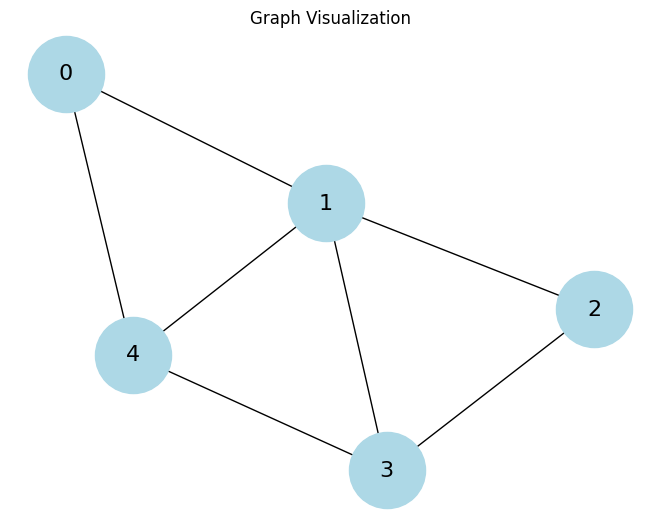

In [4]:
import matplotlib.pyplot as plt
import networkx as nx

class Graph:
    def __init__(self):
        self.graph_list_dict = {}

    def add_edge(self, u, v):
        if u not in self.graph_list_dict:
            self.graph_list_dict[u] = []
        if v not in self.graph_list_dict:
            self.graph_list_dict[v] = []
        self.graph_list_dict[u].append(v)
        self.graph_list_dict[v].append(u)  

    def display(self):
        print("Adjacency List:")
        for vertex in self.graph_list_dict:
            print(f"{vertex}: {self.graph_list_dict[vertex]}")

    def plot(self):
        G = nx.Graph()  
        for vertex in self.graph_list_dict:
            G.add_node(vertex)
            for neighbor in self.graph_list_dict[vertex]:
                G.add_edge(vertex, neighbor)


        pos = nx.spring_layout(G, seed=5)
    
        nx.draw(G, pos, with_labels=True ,node_color='lightblue', node_size=3000, font_size=16, font_color='black')
        plt.title('Graph Visualization')
        plt.show()


graph = Graph()  
graph.add_edge(0, 1)
graph.add_edge(0, 4)
graph.add_edge(1, 2)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.display()  
graph.plot()     

### Undirected Graph with DFS and BFS 

Diplay initial views of graph
Adjacency List:
0: [1, 4]
1: [0, 2, 3, 4]
2: [1, 3]
4: [0, 1, 3]
3: [1, 2, 4]


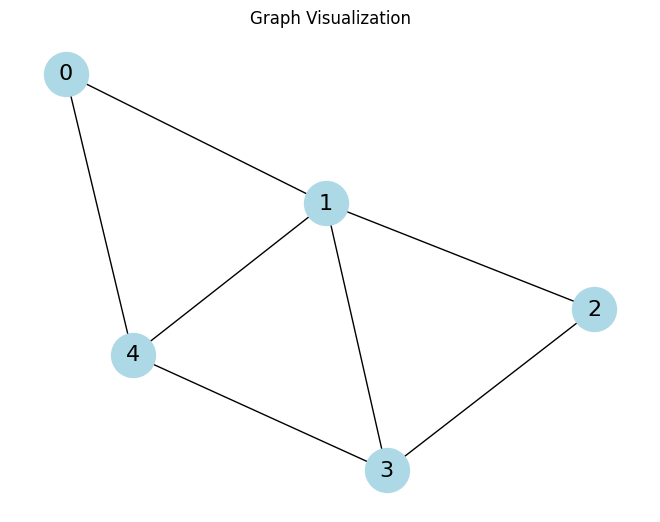

Graph after deleting edge 3 - 4


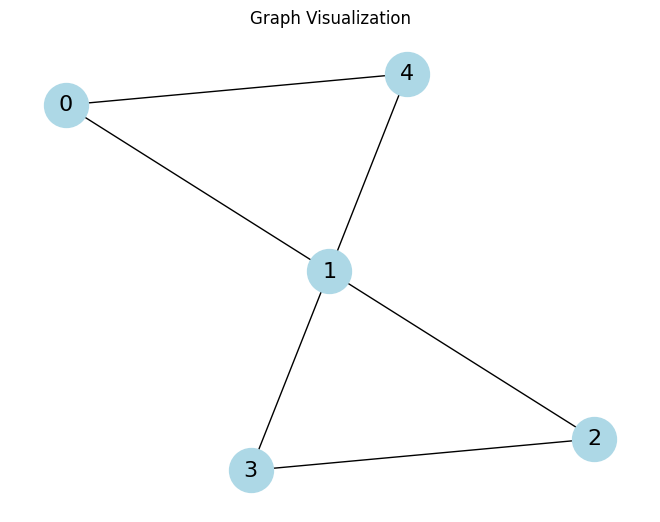

Graph after deleting node 3


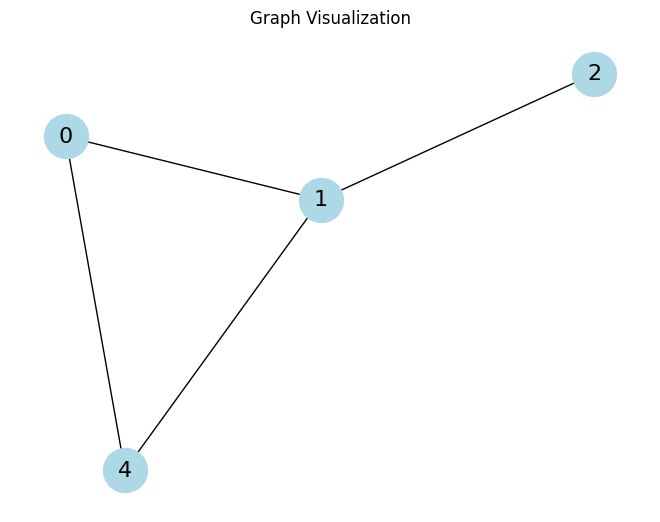

Find and Display DFS paths 
Find and Display BFS paths 
Visualization of DFS AND BFS
DFS traversal starting from vertex 0: [0, 4, 1, 2]
BFS traversal starting from vertex 0: [0, 1, 4, 2]
Ploting DFS paths 


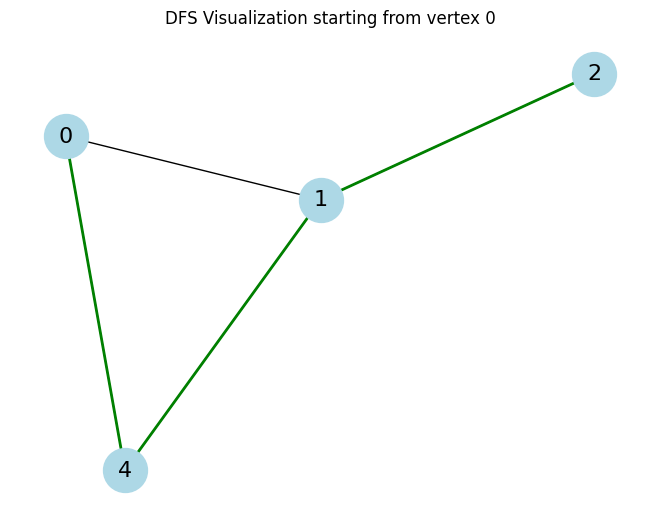

Ploting BFS paths 


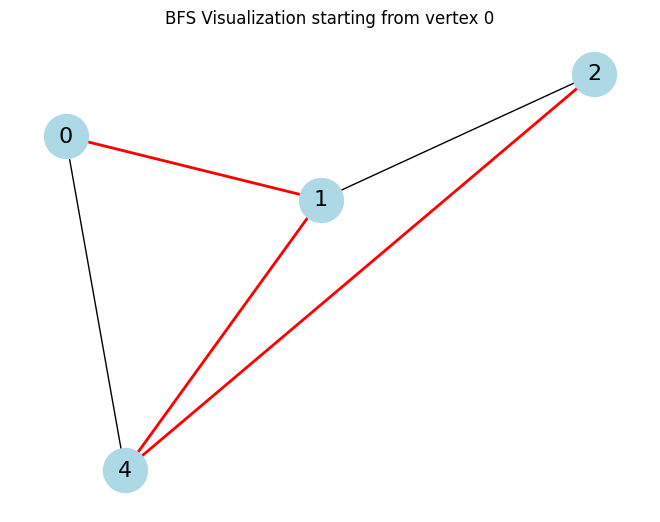

In [26]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self):
        self.graph_list_dict = {}

    def add_edge(self, u, v):
        if u not in self.graph_list_dict:
            self.graph_list_dict[u] = []
        if v not in self.graph_list_dict:
            self.graph_list_dict[v] = []
        self.graph_list_dict[u].append(v)
        self.graph_list_dict[v].append(u) 
    
    def delete_edge(self, e1, e2):
        """Deletes an undirected edge between e1 and e2"""
        if e1 in self.graph_list_dict and e2 in self.graph_list_dict[e1]:
            self.graph_list_dict[e1].remove(e2)
        if e2 in self.graph_list_dict and e1 in self.graph_list_dict[e2]:
            self.graph_list_dict[e2].remove(e1)

    def delete_node(self, node):
        """Deletes a node and all edges associated with it in an undirected graph"""
        if node in self.graph_list_dict:
            del self.graph_list_dict[node]  # Remove the node and its associated edges
        for neighbors in self.graph_list_dict.values():
            if node in neighbors:
                neighbors.remove(node)  # Remove all references to the node in other adjacency lists
                 

    def display(self):
        print("Adjacency List:")
        for vertex in self.graph_list_dict:
            print(f"{vertex}: {self.graph_list_dict[vertex]}")

    def plot(self):
        G = nx.Graph()  
        for vertex in self.graph_list_dict:
            G.add_node(vertex)
            for neighbor in self.graph_list_dict[vertex]:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows = True)
        plt.title('Graph Visualization')
        plt.show()

    def dfs(self, start):
        visited = set()
        stack = [start]
        traversal_order = []

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                traversal_order.append(vertex)
                # Add neighbors to the stack in normal order
                for neighbor in self.graph_list_dict.get(vertex, []):
                    if neighbor not in visited:
                        stack.append(neighbor)

        return traversal_order

    def plot_dfs(self, start):
        dfs_order = self.dfs(start)
        

        G = nx.Graph()
        for vertex in self.graph_list_dict:
            G.add_node(vertex)
            for neighbor in self.graph_list_dict[vertex]:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)


        nx.draw(G, pos, with_labels=True,node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows=True)


        bfs_edges = [(dfs_order[i], dfs_order[i + 1]) for i in range(len(dfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='green', width=2, arrows=True)

        plt.title(f'DFS Visualization starting from vertex {start}')
        plt.show()
    
    def bfs(self, start):
        visited = set()
        queue = deque([start])
        visited.add(start)
        traversal_order = []

        while queue:
            vertex = queue.popleft()
            traversal_order.append(vertex)
            for neighbor in self.graph_list_dict.get(vertex, []):
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append(neighbor)

        return traversal_order

    def plot_bfs(self, start):
        bfs_order = self.bfs(start)
        

        G = nx.Graph()
        for vertex in self.graph_list_dict:
            G.add_node(vertex)
            for neighbor in self.graph_list_dict[vertex]:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)


        nx.draw(G, pos, with_labels=True,node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows=True)


        bfs_edges = [(bfs_order[i], bfs_order[i + 1]) for i in range(len(bfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='red', width=2, arrows=True)

        plt.title(f'BFS Visualization starting from vertex {start}')
        plt.show()


graph = Graph()  
graph.add_edge(0, 1)
graph.add_edge(1, 2)
graph.add_edge(0, 4)
graph.add_edge(1, 3)
graph.add_edge(1, 4)
graph.add_edge(2, 3)
graph.add_edge(3, 4)

print("Diplay initial views of graph")
graph.display()  
graph.plot()     

print("Graph after deleting edge 3 - 4")
graph.delete_edge(3,4)
graph.plot()

print("Graph after deleting node 3")
graph.delete_node(3)
graph.plot()

print("Find and Display DFS paths ")
dfs_result = graph.dfs(0)

print("Find and Display BFS paths ")
bfs_result = graph.bfs(0)

print("Visualization of DFS AND BFS")
print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")

print("Ploting DFS paths ")
graph.plot_dfs(0)

print("Ploting BFS paths ")
graph.plot_bfs(0)

### Directed Graph with BFS And DFS

Adjacency List:
0: [1, 4]
1: [2]
2: [3]
3: [4]
4: [0]


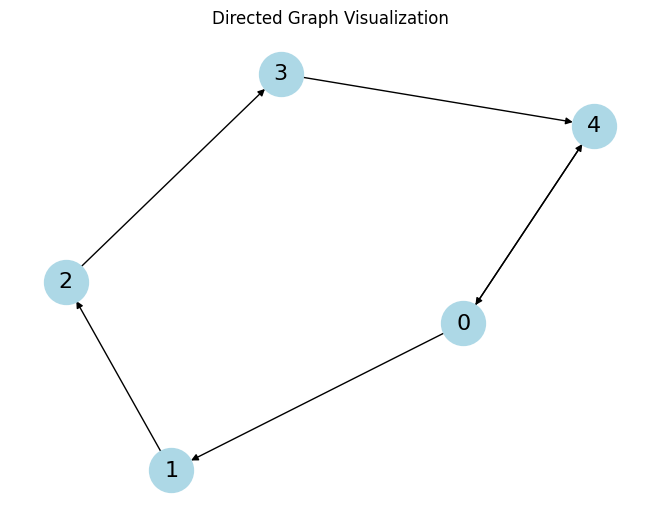

Graph after deleting edge 0 - 4


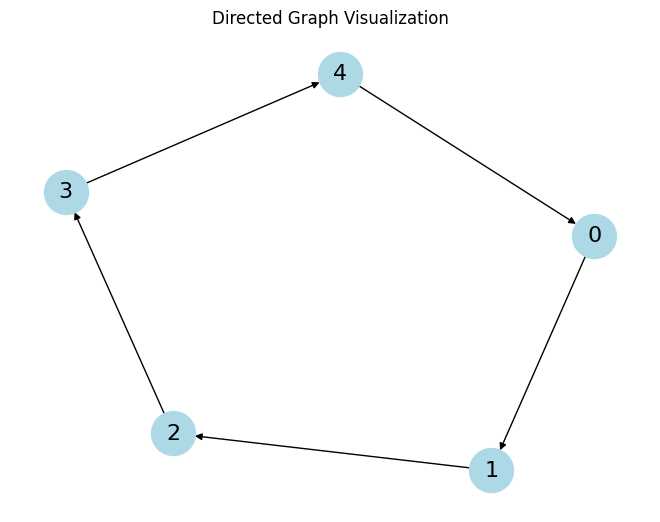

Graph after deleting node 2


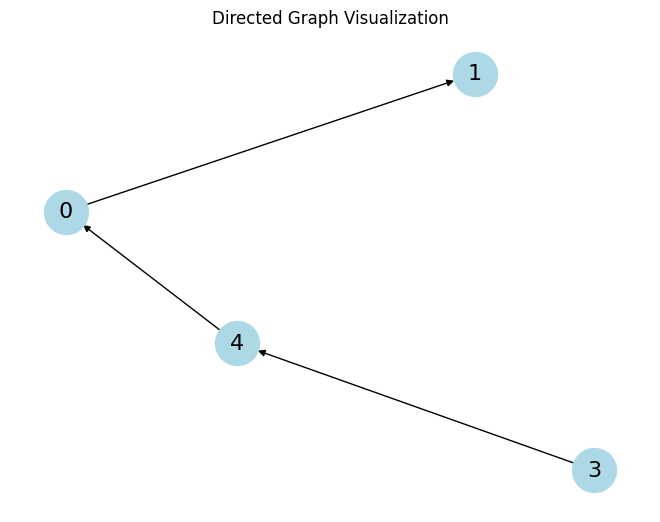

DFS traversal starting from vertex 0: [0, 1]
BFS traversal starting from vertex 0: [0, 1]


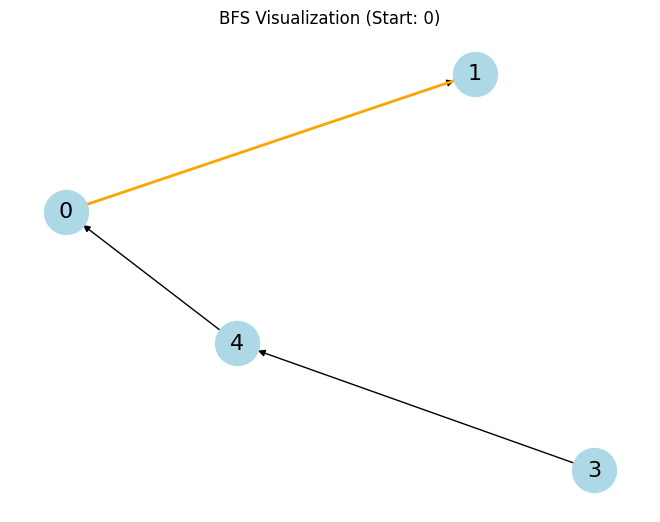

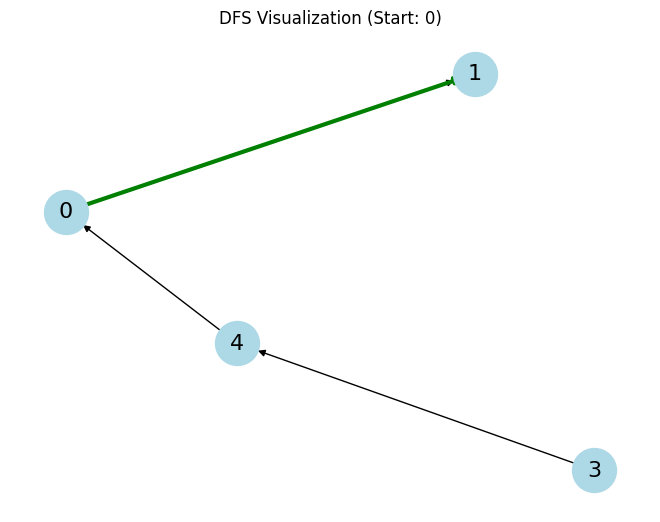

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import deque

class Graph:
    def __init__(self):
        self.graph_list_dict = {}

    def add_edge(self, e1, e2):
        if e1 not in self.graph_list_dict:
            self.graph_list_dict[e1] = []
        self.graph_list_dict[e1].append(e2)  
    
    
    def delete_edge(self, e1, e2):
        if e1 in self.graph_list_dict and e2 in self.graph_list_dict[e1]:
            self.graph_list_dict[e1].remove(e2)

    def delete_node(self, node):
        if node in self.graph_list_dict:
            del self.graph_list_dict[node]  # Remove outgoing edges
        for neighbors in self.graph_list_dict.values():
            if node in neighbors:
                neighbors.remove(node)  # Remove incoming edges
            

    def display(self):
        print("Adjacency List:")
        for vertex, neighbors in self.graph_list_dict.items():
            print(f"{vertex}: {neighbors}")

    def plot(self):
        G = nx.DiGraph()  # Directed Graph
        for vertex, neighbors in self.graph_list_dict.items():
            for neighbor in neighbors:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows=True)
        plt.title('Directed Graph Visualization')
        plt.show()

    def dfs(self, start):
        visited = set()
        stack = [start]
        traversal_order = []

        while stack:
            vertex = stack.pop()
            if vertex not in visited:
                visited.add(vertex)
                traversal_order.append(vertex)
                stack.extend(reversed(self.graph_list_dict.get(vertex, [])))  # Reverse for correct order

        return traversal_order

    def plot_dfs(self, start):
        dfs_order = self.dfs(start)

        G = nx.DiGraph()
        for vertex, neighbors in self.graph_list_dict.items():
            for neighbor in neighbors:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows=True)

        dfs_edges = [(dfs_order[i], dfs_order[i + 1]) for i in range(len(dfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=dfs_edges, edge_color='green', width=3, arrows=True)

        plt.title(f'DFS Visualization (Start: {start})')
        plt.show()

    def bfs(self, start):
        
        visited = set()    
        queue = deque([start])  
        traversal_order = []  

        while queue:
            vertex = queue.popleft()
            if vertex not in visited:
                visited.add(vertex)
                traversal_order.append(vertex)

                for neighbor in self.graph_list_dict.get(vertex, []):
                    if neighbor not in visited and neighbor not in queue:
                        queue.append(neighbor)

        return traversal_order

    def plot_bfs(self, start):
        bfs_order = self.bfs(start)

        G = nx.DiGraph()
        for vertex, neighbors in self.graph_list_dict.items():
            for neighbor in neighbors:
                G.add_edge(vertex, neighbor)

        pos = nx.spring_layout(G, seed=5)
        nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1000, font_size=16, font_color='black', arrows=True)

        bfs_edges = [(bfs_order[i], bfs_order[i + 1]) for i in range(len(bfs_order) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=bfs_edges, edge_color='orange', width=2, arrows=True)

        plt.title(f'BFS Visualization (Start: {start})')
        plt.show()


graph = Graph()  
graph.add_edge(0, 1)
graph.add_edge(1, 2)
graph.add_edge(2, 3)
graph.add_edge(3, 4)
graph.add_edge(4, 0)
graph.add_edge(0, 4)

graph.display()  
graph.plot()     

# Delete an edge and a node
print("Graph after deleting edge 0 - 4")
graph.delete_edge(0, 4)
graph.plot()

# Delete an edge and a node
print("Graph after deleting node 2")
graph.delete_node(2)
graph.plot()

dfs_result = graph.dfs(0)
bfs_result = graph.bfs(0)
print(f"DFS traversal starting from vertex 0: {dfs_result}")
print(f"BFS traversal starting from vertex 0: {bfs_result}")

# Plot BFS traversal
graph.plot_bfs(0)
graph.plot_dfs(0)
